In [1]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "ml-25m.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

File Name                                             Modified             Size
ml-25m/                                        2019-11-21 16:41:38            0
ml-25m/tags.csv                                2019-11-21 15:55:50     38810332
ml-25m/links.csv                               2019-11-21 16:40:20      1368578
ml-25m/README.txt                              2019-11-21 16:41:38        10460
ml-25m/ratings.csv                             2019-11-21 16:26:42    678260987
ml-25m/genome-tags.csv                         2019-11-21 16:35:38        18103
ml-25m/genome-scores.csv                       2019-11-21 16:35:38    435164157
ml-25m/movies.csv                              2019-11-21 16:32:10      3038099
Extracting all the files now...
Done!


In [1]:
import pandas as pd
import numpy as np
from fastai.collab import *

In [2]:
rating = pd.read_csv('ml-25m/ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
rating.shape

(25000095, 4)

In [4]:
data = CollabDataBunch.from_df(rating, seed=42, valid_pct=0.1, user_name='userId', item_name='movieId', rating_name='rating')


In [5]:
data.show_batch()

userId,movieId,target
145803,1876,4.0
56289,2174,4.0
152772,2024,4.0
131906,1407,3.5
136672,246,4.0


In [6]:
learn = collab_learner(data, n_factors=40, wd=1e-1, y_range=(0.5,5))

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


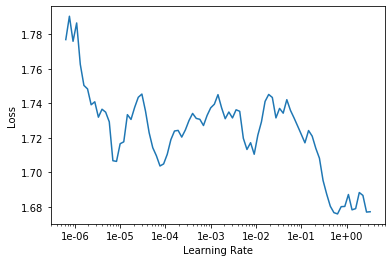

In [7]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5, 3e-6)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [8]:
(users, items), ratings = next(iter(data.valid_dl))
preds = learn.model(users, items)
print('Real\tPred\tDifference')
for p in list(zip(ratings, preds))[:16]:
    print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))

Real	Pred	Difference
3.5	2.8	-0.7
4.0	2.8	-1.2
3.0	2.8	-0.2
4.0	2.8	-1.2
5.0	2.7	-2.3
3.0	2.7	-0.3
2.0	2.7	0.7
4.0	2.8	-1.2
5.0	2.8	-2.2
3.5	2.7	-0.8
3.0	2.8	-0.2
5.0	2.8	-2.2
3.0	2.7	-0.3
3.0	2.8	-0.2
4.5	2.7	-1.8
4.0	2.7	-1.3


In [9]:
top = rating.groupby('movieId')['rating'].count()
top_movies = top.sort_values(ascending=False).index.values[:1000]
top_movies = top_movies.astype(str)

In [10]:
#top 10 movies
top_movies = [int(i) for i in top_movies] 
print(top_movies[:10])

[356, 318, 296, 593, 2571, 260, 480, 527, 110, 2959]


In [11]:
print(learn.summary())

EmbeddingDotBias
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [40]                 6,501,680  True      
______________________________________________________________________
Embedding            [40]                 2,315,520  True      
______________________________________________________________________
Embedding            [1]                  162,542    True      
______________________________________________________________________
Embedding            [1]                  57,888     True      
______________________________________________________________________

Total params: 9,037,630
Total trainable params: 9,037,630
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function : FlattenedLoss
Callbacks functions applied 

